In [1]:
import hiive.mdptoolbox.mdp as mdp
import hiive.mdptoolbox.example as ex
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def parsetraj(traj):
    rewards = []
    its = []
    times = []
    for i in range(len(traj)):
        rewards.append(traj[i]['Mean V'])
        its.append(traj[i]['Iteration'])
        times.append(traj[i]['Time'])
    return its, rewards, times

# Part 1 - non-gridworld, small

In [3]:
max_iter = 10000
eps = 1e-6

You can keep collectuing the reward for sitting at the final state for a long time, that's why the reward is sometimes larger than the addition of all the rewards for each state. It's also not assumed that you start from scratch at every episode. Essentially, the policy learned says "suppose you acquire a forest this old, what do you do?"

## Value Iteration

##### Look at convergence behavior

In [41]:
S = 8
r1 = 4
r2 = 2

In [42]:
P, R = ex.forest(S=S, r1=r1, r2=r2, p=0.2)

In [43]:
vi = mdp.ValueIteration(P, R, 0.9, max_iter=max_iter, epsilon=eps)
vi_traj = vi.run()

In [44]:
its, rewards, times = parsetraj(vi_traj)

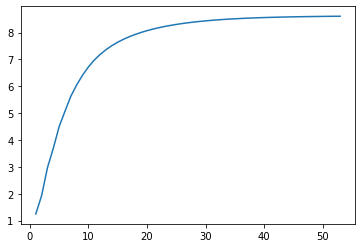

In [45]:
plt.plot(its, rewards)

In [46]:
vi.policy

(0, 1, 0, 0, 0, 0, 0, 0)

In [47]:
vi.P

(array([[0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0. , 0.8, 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0. , 0. , 0.8, 0. , 0. , 0. , 0. ],
        [0.2, 0. , 0. , 0. , 0.8, 0. , 0. , 0. ],
        [0.2, 0. , 0. , 0. , 0. , 0.8, 0. , 0. ],
        [0.2, 0. , 0. , 0. , 0. , 0. , 0.8, 0. ],
        [0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0.8],
        [0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0.8]]),
 array([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.]]))

In [48]:
vi_traj

[{'State': None,
  'Action': None,
  'Reward': 4.0,
  'Error': 4.0,
  'Time': 6.628036499023438e-05,
  'Max V': 4.0,
  'Mean V': 1.25,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 6.880000000000001,
  'Error': 2.880000000000001,
  'Time': 0.0001537799835205078,
  'Max V': 6.880000000000001,
  'Mean V': 1.9350000000000003,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 9.083200000000001,
  'Error': 2.073600000000001,
  'Time': 0.00023865699768066406,
  'Max V': 9.083200000000001,
  'Mean V': 2.9764000000000004,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 10.692832000000003,
  'Error': 1.4929920000000019,
  'Time': 0.00031495094299316406,
  'Max V': 10.692832000000003,
  'Mean V': 3.6995680000000006,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 11.93994688,
  'Error': 1.07495424,
  'Time': 0.000385284423828125,
  'Max V': 11.93994688,
  'Mean V': 4.506806720000001,
  'Iteration': 5},
 {'State': None,
  'Ac

##### Run over multiple discount factors

In [49]:
disc_fac_range = [i / 10 for i in range(1, 10, 1)]
disc_fac_range.append(0.93)
disc_fac_range.append(0.95)
disc_fac_range.append(0.99)
disc_fac_range.append(0.9999)

disc_fact: 0.1
policy: (0, 1, 1, 1, 1, 1, 1, 0)
reward: 1.310162112

disc_fact: 0.2
policy: (0, 1, 1, 1, 1, 1, 1, 0)
reward: 1.3936763787264

disc_fact: 0.3
policy: (0, 1, 1, 1, 1, 1, 0, 0)
reward: 1.532650932563851

disc_fact: 0.4
policy: (0, 1, 1, 1, 1, 1, 0, 0)
reward: 1.758981567746821

disc_fact: 0.5
policy: (0, 1, 1, 1, 1, 1, 0, 0)
reward: 2.06546919574815

disc_fact: 0.6
policy: (0, 1, 1, 1, 1, 0, 0, 0)
reward: 2.5593614136590963

disc_fact: 0.7
policy: (0, 1, 1, 1, 0, 0, 0, 0)
reward: 3.3576264391682313

disc_fact: 0.8
policy: (0, 1, 1, 0, 0, 0, 0, 0)
reward: 4.869462403247789

disc_fact: 0.9
policy: (0, 1, 0, 0, 0, 0, 0, 0)
reward: 8.609828417870453

disc_fact: 0.93
policy: (0, 0, 0, 0, 0, 0, 0, 0)
reward: 8.82766154958011

disc_fact: 0.95
policy: (0, 0, 0, 0, 0, 0, 0, 0)
reward: 9.594804494603856

disc_fact: 0.99
policy: (0, 0, 0, 0, 0, 0, 0, 0)
reward: 11.48925544795346

disc_fact: 0.9999
policy: (0, 0, 0, 0, 0, 0, 0, 0)
reward: 11.328631725397523

Total time: 0.000731468200

Text(0, 0.5, 'Average Reward')

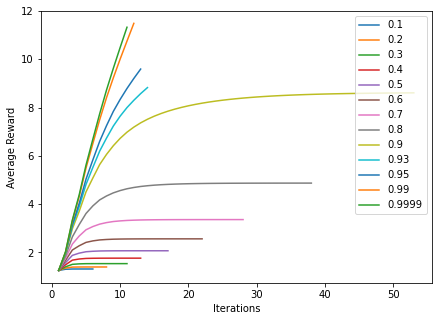

In [50]:
plt.figure(figsize=(7,5))
for i in disc_fac_range:
    vi = mdp.ValueIteration(P, R, i, max_iter=max_iter, epsilon=eps)
    vi_traj = vi.run()
    print("disc_fact:", i)
    print("policy:", vi.policy)
    print("reward:", vi_traj[-1]['Mean V'])
    print()
    its, rewards, times = parsetraj(vi_traj)
    a = plt.plot(its, rewards, label=f"{i}");
    
print("Total time:", vi_traj[-1]['Time'])
plt.legend();
# ymax = (10-1)*r2+r1+4;
# plt.yticks(range(0, ymax, 2));
plt.xlabel("Iterations")
plt.ylabel("Average Reward")

Note that above, the value function changes when adding more 9s, but the policy doesn't. 
In this case, it is iterating without improvement and policy iteration might converge faster

##### Run over multiple sizes of the env

In [51]:
max_forest_size = 8
r1 = 4
r2 = 0.5

forest size: 2
policy: (0, 0)
reward: 4.16

forest size: 3
policy: (0, 0, 0)
reward: 5.164453333333333

forest size: 4
policy: (0, 0, 0, 0)
reward: 4.982796352

forest size: 5
policy: (0, 1, 0, 0, 0)
reward: 6.187756318506783

forest size: 6
policy: (0, 1, 1, 0, 0, 0)
reward: 5.819665988212446

forest size: 7
policy: (0, 1, 1, 1, 0, 0, 0)
reward: 5.556744323716489

forest size: 8
policy: (0, 1, 1, 1, 1, 0, 0, 0)
reward: 5.3595530753445235

Total time: 0.0022940635681152344


Text(0, 0.5, 'Average Reward')

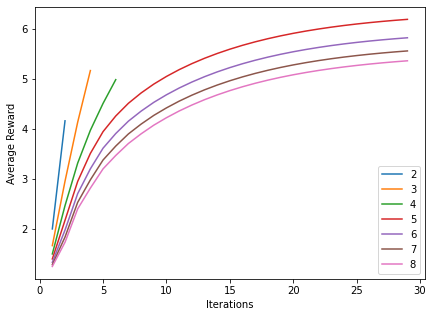

In [52]:
plt.figure(figsize=(7,5))
for i in range(2,max_forest_size+1): # forest sizes
    P, R = ex.forest(S=i, r1=r1, r2=r2, p=0.4)
    vi = mdp.ValueIteration(P, R, 0.9, max_iter=max_iter, epsilon=eps)
    vi_traj = vi.run()
    print("forest size:", i)
    print("policy:", vi.policy)
    print("reward:", vi_traj[-1]['Mean V'])
    print()
    its, rewards, times = parsetraj(vi_traj)
    a = plt.plot(its, rewards, label=f"{i}");
    
print("Total time:", vi_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Average Reward")

##### Run over multiple probabilities of the forest burning down

In [53]:
burn_prob = [i / 10 for i in range(1, 10, 1)] + [0.95, 0.99]
S = 8
r1 = 4
r2 = 1

burn probability: 0.1
policy: (0, 0, 0, 0, 0, 0, 0, 0)
reward: 10.121507554769789

burn probability: 0.2
policy: (0, 1, 0, 0, 0, 0, 0, 0)
reward: 8.609828417870453

burn probability: 0.3
policy: (0, 1, 1, 0, 0, 0, 0, 0)
reward: 6.580222380693407

burn probability: 0.4
policy: (0, 1, 1, 1, 1, 0, 0, 0)
reward: 5.3595530753445235

burn probability: 0.5
policy: (0, 1, 1, 1, 1, 0, 0, 0)
reward: 4.410692814102017

burn probability: 0.6
policy: (0, 1, 1, 1, 1, 1, 0, 0)
reward: 3.636875079007465

burn probability: 0.7
policy: (0, 1, 1, 1, 1, 1, 0, 0)
reward: 2.8872395727384887

burn probability: 0.8
policy: (0, 1, 1, 1, 1, 1, 1, 0)
reward: 2.224501976151872

burn probability: 0.9
policy: (0, 1, 1, 1, 1, 1, 1, 0)
reward: 1.6605363160084063

burn probability: 0.95
policy: (0, 1, 1, 1, 1, 1, 1, 0)
reward: 1.4131820017988281

burn probability: 0.99
policy: (0, 1, 1, 1, 1, 1, 1, 0)
reward: 1.270962805625

Total time: 0.0001671314239501953


Text(0, 0.5, 'Average Reward')

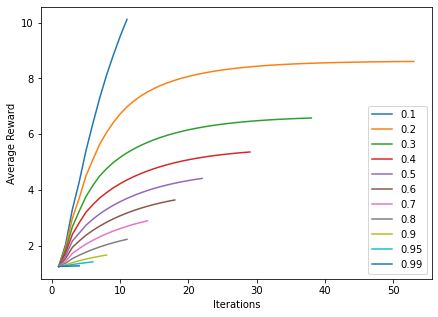

In [54]:
plt.figure(figsize=(7,5))
for i in burn_prob:
    P, R = ex.forest(S=S, r1=r1, r2=r2, p=i)
    vi = mdp.ValueIteration(P, R, 0.9, max_iter=max_iter, epsilon=eps)
    vi_traj = vi.run()
    print("burn probability:", i)
    print("policy:", vi.policy)
    print("reward:", vi_traj[-1]['Mean V'])
    print()
    its, rewards, times = parsetraj(vi_traj)
    a = plt.plot(its, rewards, label=f"{i}");
    
print("Total time:", vi_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Average Reward")


## Policy Iteration

look at convergence behavior

In [55]:
S = 8
r1 = 4
r2 = 2

In [56]:
P, R = ex.forest(S=S, r1=r1, r2=r2, p=0.2)

In [57]:
pi = mdp.PolicyIteration(P, R, 0.9, max_iter=max_iter)
pi_traj = pi.run()

In [58]:
its, rewards, times = parsetraj(pi_traj)

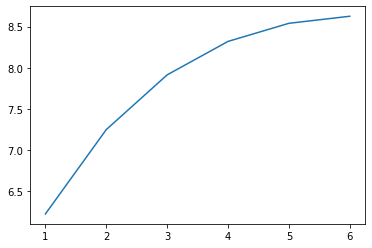

In [59]:
plt.plot(its, rewards)

In [60]:
pi.policy

(0, 1, 0, 0, 0, 0, 0, 0)

In [61]:
pi.P

(array([[0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0. , 0.8, 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0. , 0. , 0.8, 0. , 0. , 0. , 0. ],
        [0.2, 0. , 0. , 0. , 0.8, 0. , 0. , 0. ],
        [0.2, 0. , 0. , 0. , 0. , 0.8, 0. , 0. ],
        [0.2, 0. , 0. , 0. , 0. , 0. , 0.8, 0. ],
        [0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0.8],
        [0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0.8]]),
 array([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.]]))

In [62]:
pi_traj;

##### Run over multiple discount factors

In [63]:
disc_fac_range = [i / 10 for i in range(1, 10, 1)]
disc_fac_range.append(0.93)
disc_fac_range.append(0.95)
# disc_fac_range.append(0.99) Does not converge to normal values
# disc_fac_range.append(0.9999) Does not converge to normal values

disc_fact: 0.1
policy: (0, 1, 1, 1, 1, 1, 1, 0)
reward: 1.3101628198246558

disc_fact: 0.2
policy: (0, 1, 1, 1, 1, 1, 1, 0)
reward: 1.3936781609195403

disc_fact: 0.3
policy: (0, 1, 1, 1, 1, 1, 0, 0)
reward: 1.5326521950036383

disc_fact: 0.4
policy: (0, 1, 1, 1, 1, 1, 0, 0)
reward: 1.7589869281045754

disc_fact: 0.5
policy: (0, 1, 1, 1, 1, 1, 0, 0)
reward: 2.0654761904761902

disc_fact: 0.6
policy: (0, 1, 1, 1, 1, 0, 0, 0)
reward: 2.559376299376299

disc_fact: 0.7
policy: (0, 1, 1, 1, 0, 0, 0, 0)
reward: 3.357694949494949

disc_fact: 0.8
policy: (0, 1, 1, 0, 0, 0, 0, 0)
reward: 4.869924205962063

disc_fact: 0.9
policy: (0, 1, 0, 0, 0, 0, 0, 0)
reward: 8.626526906046506

disc_fact: 0.93
policy: (0, 0, 0, 0, 0, 0, 0, 0)
reward: 12.152094597479927

disc_fact: 0.95
policy: (0, 0, 0, 0, 0, 0, 0, 0)
reward: 16.989669420236794

Total time: 0.001947164535522461


Text(0, 0.5, 'Average Reward')

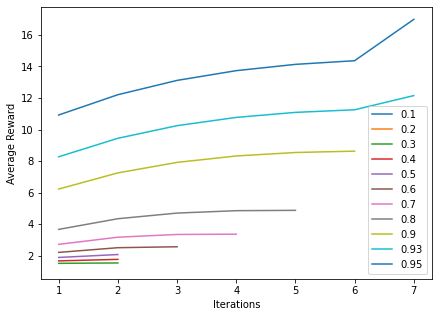

In [64]:
plt.figure(figsize=(7,5))
for i in disc_fac_range:
    pi = mdp.PolicyIteration(P, R, i, max_iter=max_iter)
    pi_traj = pi.run()
    print("disc_fact:", i)
    print("policy:", pi.policy)
    print("reward:", pi_traj[-1]['Mean V'])
    print()
    its, rewards, times = parsetraj(pi_traj)
    a = plt.plot(its, rewards, label=f"{i}");
print("Total time:", pi_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Average Reward")

##### Run over multiple sizes of the env

In [65]:
max_forest_size = 8
r1 = 4
r2 = 0.5

forest size: 2
policy: (0, 0)
reward: 23.60000000000002

forest size: 3
policy: (0, 0, 0)
reward: 14.437333333333344

forest size: 4
policy: (0, 0, 0, 0)
reward: 9.253360000000008

forest size: 5
policy: (0, 1, 0, 0, 0)
reward: 6.364386222473179

forest size: 6
policy: (0, 1, 1, 0, 0, 0)
reward: 5.996295878035009

forest size: 7
policy: (0, 1, 1, 1, 0, 0, 0)
reward: 5.733374203436315

forest size: 8
policy: (0, 1, 1, 1, 1, 0, 0, 0)
reward: 5.536182947487295

Total time: 0.0007791519165039062


Text(0, 0.5, 'Average Reward')

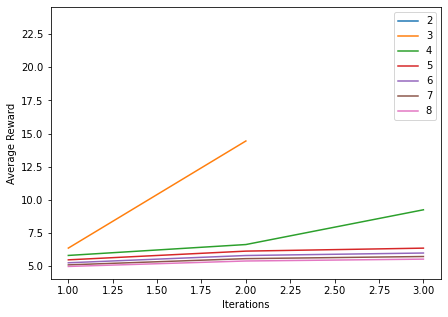

In [66]:
plt.figure(figsize=(7,5))
for i in range(2,max_forest_size+1): # forest sizes
    P, R = ex.forest(S=i, r1=r1, r2=r2, p=0.4)
    pi = mdp.PolicyIteration(P, R, 0.9, max_iter=max_iter)
    pi_traj = pi.run()
    print("forest size:", i)
    print("policy:", pi.policy)
    print("reward:", pi_traj[-1]['Mean V'])
    print()
    its, rewards, times = parsetraj(pi_traj)
    a = plt.plot(its, rewards, label=f"{i}");
    
print("Total time:", pi_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Average Reward")

##### Run over multiple probabilities of the forest burning down

In [67]:
burn_prob = [i / 10 for i in range(1, 10, 1)] + [0.95, 0.99]
S = 8
r1 = 4
r2 = 1

burn probability: 0.1
policy: (0, 0, 0, 0, 0, 0, 0, 0)
reward: 15.618455704967912

burn probability: 0.2
policy: (0, 1, 0, 0, 0, 0, 0, 0)
reward: 8.626526906046506

burn probability: 0.3
policy: (0, 1, 1, 0, 0, 0, 0, 0)
reward: 6.655361361548671

burn probability: 0.4
policy: (0, 1, 1, 1, 1, 0, 0, 0)
reward: 5.536182947487295

burn probability: 0.5
policy: (0, 1, 1, 1, 1, 0, 0, 0)
reward: 4.738949843260189

burn probability: 0.6
policy: (0, 1, 1, 1, 1, 1, 0, 0)
reward: 4.065716911764708

burn probability: 0.7
policy: (0, 1, 1, 1, 1, 1, 0, 0)
reward: 3.4151655700571686

burn probability: 0.8
policy: (0, 1, 1, 1, 1, 1, 1, 0)
reward: 2.747519636213312

burn probability: 0.9
policy: (0, 1, 1, 1, 1, 1, 1, 0)
reward: 2.0518701482004236

burn probability: 0.95
policy: (0, 1, 1, 1, 1, 1, 1, 0)
reward: 1.666249154537939

burn probability: 0.99
policy: (0, 1, 1, 1, 1, 1, 1, 0)
reward: 1.3359232097799925

Total time: 0.0002570152282714844


Text(0, 0.5, 'Average Reward')

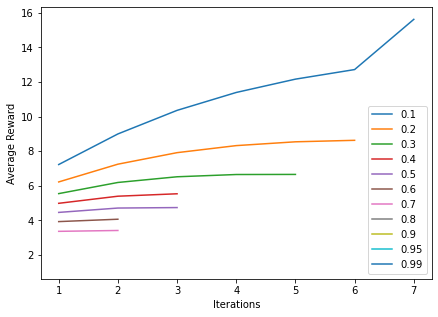

In [68]:
plt.figure(figsize=(7,5))
for i in burn_prob:
    P, R = ex.forest(S=S, r1=r1, r2=r2, p=i)
    pi = mdp.PolicyIteration(P, R, 0.9, max_iter=max_iter)
    pi_traj = pi.run()
    print("burn probability:", i)
    print("policy:", pi.policy)
    print("reward:", pi_traj[-1]['Mean V'])
    print()
    its, rewards, times = parsetraj(pi_traj)
    a = plt.plot(its, rewards, label=f"{i}");
    
print("Total time:", pi_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Average Reward")

## Q-Learning

look at convergence behavior

In [69]:
n_iter = 40000000
S = 8
r1 = 4
r2 = 2

In [70]:
P, R = ex.forest(S=S, r1=r1, r2=r2, p=0.2)

In [71]:
ql = mdp.QLearning(P, R, 0.9, n_iter=n_iter)
ql_traj = ql.run()

In [72]:
its, rewards, times = parsetraj(ql_traj)

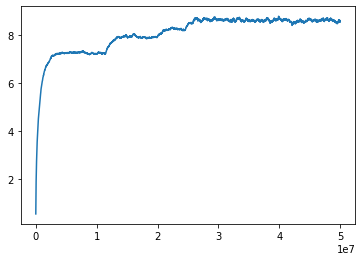

In [73]:
plt.plot(its, rewards)

In [74]:
ql.policy

(0, 1, 0, 0, 0, 0, 0, 0)

In [38]:
ql.P

(array([[0.2, 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. ],
        [0.2, 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. ],
        [0.2, 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. ],
        [0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. ],
        [0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. ],
        [0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8],
        [0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8]]),
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

In [39]:
ql_traj

[{'State': 5,
  'Action': 0,
  'Reward': 0.0,
  'Error': 1.1212271431858874e-06,
  'Time': 0.19213390350341797,
  'Alpha': 0.001,
  'Epsilon': 0.1,
  'Gamma': 0.9,
  'Max V': 2.1054738609639,
  'Mean V': 0.5381645004193466,
  'Iteration': 5000},
 {'State': 1,
  'Action': 1,
  'Reward': 1.0,
  'Error': 0.0002442382366390401,
  'Time': 0.37172579765319824,
  'Alpha': 0.001,
  'Epsilon': 0.1,
  'Gamma': 0.9,
  'Max V': 2.6487377084583392,
  'Mean V': 0.6750399188635712,
  'Iteration': 10000},
 {'State': 4,
  'Action': 0,
  'Reward': 0.0,
  'Error': 4.646541392923168e-05,
  'Time': 0.5522003173828125,
  'Alpha': 0.001,
  'Epsilon': 0.1,
  'Gamma': 0.9,
  'Max V': 3.0842289709031427,
  'Mean V': 0.7934971106848614,
  'Iteration': 15000},
 {'State': 7,
  'Action': 1,
  'Reward': 1.0,
  'Error': 0.003464948131329436,
  'Time': 0.7311294078826904,
  'Alpha': 0.001,
  'Epsilon': 0.1,
  'Gamma': 0.9,
  'Max V': 3.4327922853203865,
  'Mean V': 0.902500416187778,
  'Iteration': 20000},
 {'State': 

##### Run over multiple discount factors

In [75]:
disc_fac_range = [0.1,0.3,0.5,0.7,0.9,0.95]
# disc_fac_range.append(0.99) Does not converge to normal values
# disc_fac_range.append(0.9999) Does not converge to normal values

disc_fact: 0.1
policy: (0, 1, 1, 1, 1, 1, 1, 0)
reward: 1.3021000477508102

disc_fact: 0.3
policy: (0, 1, 1, 1, 1, 1, 1, 0)
reward: 1.4124684733340607

disc_fact: 0.5
policy: (0, 1, 1, 1, 1, 1, 0, 0)
reward: 2.046151635673836

disc_fact: 0.7
policy: (0, 1, 1, 1, 1, 1, 0, 0)
reward: 3.1524248563593327

disc_fact: 0.9
policy: (0, 1, 1, 0, 1, 1, 0, 0)
reward: 7.07072480275319

disc_fact: 0.95
policy: (0, 1, 1, 1, 1, 1, 0, 0)
reward: 11.923839229086868

Total time: 106.6596269607544


Text(0, 0.5, 'Average Reward')

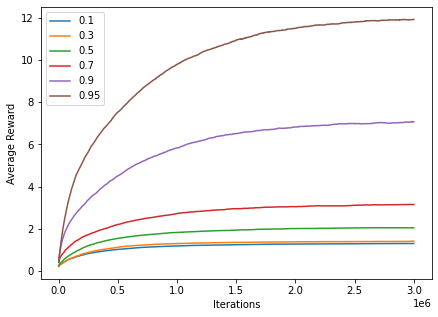

In [79]:
plt.figure(figsize=(7,5))
for i in disc_fac_range:
    ql = mdp.QLearning(P, R, i, n_iter=3000000)
    ql_traj = ql.run()
    print("disc_fact:", i)
    print("policy:", ql.policy)
    print("reward:", ql_traj[-1]['Mean V'])
    print()
    its, rewards, times = parsetraj(ql_traj)
    a = plt.plot(its, rewards, label=f"{i}");
print("Total time:", ql_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Average Reward")

##### Run over multiple sizes of the env

In [86]:
max_forest_size = 8
r1 = 4
r2 = 0.5

forest size: 2
policy: (0, 0)
reward: 23.747973613202632

forest size: 3
policy: (0, 0, 0)
reward: 14.45872047321564

forest size: 4
policy: (0, 0, 0, 0)
reward: 9.124722899840247

forest size: 5
policy: (0, 1, 0, 0, 0)
reward: 6.390963964807446

forest size: 6
policy: (0, 1, 1, 1, 0, 0)
reward: 5.672286904399335

forest size: 7
policy: (0, 1, 1, 1, 0, 0, 1)
reward: 3.593237328889

forest size: 8
policy: (0, 1, 1, 0, 0, 0, 0, 0)
reward: 5.183320294989674

Total time: 67.13119220733643


Text(0, 0.5, 'Average Reward')

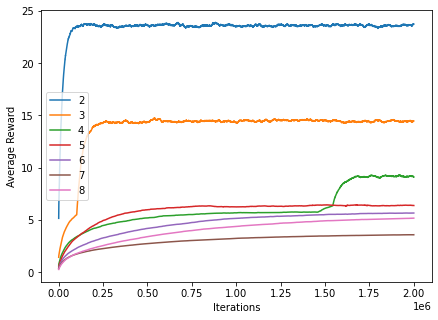

In [87]:
plt.figure(figsize=(7,5))
for i in range(2,max_forest_size+1): # forest sizes
    P, R = ex.forest(S=i, r1=r1, r2=r2, p=0.4)
    ql = mdp.QLearning(P, R, 0.9, n_iter=2000000)
    ql_traj = ql.run()
    print("forest size:", i)
    print("policy:", ql.policy)
    print("reward:", ql_traj[-1]['Mean V'])
    print()
    its, rewards, times = parsetraj(ql_traj)
    a = plt.plot(its, rewards, label=f"{i}");
    
print("Total time:", ql_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Average Reward")

##### Run over multiple probabilities of the forest burning down

In [90]:
burn_prob = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95]
S = 10
r1 = 4
r2 = 1

burn probability: 0.1
policy: (0, 1, 1, 1, 1, 1, 1, 1, 0, 0)
reward: 8.128132072328897

burn probability: 0.3
policy: (0, 1, 1, 0, 1, 1, 1, 0, 1, 0)
reward: 5.183910306032147

burn probability: 0.5
policy: (0, 1, 1, 0, 0, 1, 0, 0, 0, 0)
reward: 4.272330569747056

burn probability: 0.7
policy: (0, 1, 0, 0, 0, 0, 0, 1, 0, 0)
reward: 2.780155095084514

burn probability: 0.9
policy: (0, 1, 0, 0, 0, 0, 1, 1, 0, 0)
reward: 1.5210979752190585

burn probability: 0.95
policy: (0, 1, 0, 1, 1, 0, 0, 1, 1, 0)
reward: 1.291545029869713

Total time: 132.1058714389801


Text(0, 0.5, 'Average Reward')

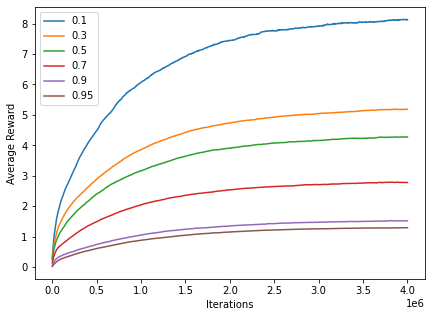

In [91]:
plt.figure(figsize=(7,5))
for i in burn_prob:
    P, R = ex.forest(S=S, r1=r1, r2=r2, p=i)
    ql = mdp.QLearning(P, R, 0.9, n_iter=4000000)
    ql_traj = ql.run()
    print("burn probability:", i)
    print("policy:", ql.policy)
    print("reward:", ql_traj[-1]['Mean V'])
    print()
    its, rewards, times = parsetraj(ql_traj)
    a = plt.plot(its, rewards, label=f"{i}");
    
print("Total time:", ql_traj[-1]['Time'])
plt.legend();
plt.xlabel("Iterations")
plt.ylabel("Average Reward")